# 2. Carga y exploración inicial del dataset

In [ ]:
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
from seaborn import load_dataset
# Enlace de descarga directa
file_id = '1tiQu76UvVDMziFp6WpfxFcr5kgKBVxOW'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Leer el archivo CSV con punto y coma como separador
df = pd.read_csv(download_url, sep=';')

# Mostrar las primeras filas
df.sample(10)

Country  Year        Food Category  Total Waste (Tons)  \
1767       Russia  2022  Fruits & Vegetables            15263.75   
1571          USA  2018         Bakery Items            25862.02   
129         China  2020       Meat & Seafood             6880.38   
3132    Argentina  2023         Bakery Items            14903.60   
3506       Mexico  2018  Fruits & Vegetables            18969.11   
4245  South Korea  2022            Beverages            14779.69   
4552        China  2020        Prepared Food             8043.25   
2865        Japan  2021          Frozen Food             4236.48   
2001       Mexico  2023  Fruits & Vegetables            38729.38   
3308  South Korea  2023         Bakery Items            17794.58   

      Economic Loss (Million $)  Avg Waste per Capita (Kg)  \
1767                   14975.08                      87.90   
1571                   24104.65                      67.58   
129                     7585.37                      71.67   
3132                   14035.31                      37.51   
3506                   15680.79                      53.34   
4245                   12125.54                     183.18   
4552                    9336.34                      41.03   
2865                    4331.67                      21.07   
2001                   35954.47                     174.94   
3308                   17921.04                      20.63   

      Population (Million)  Household Waste (%)  
1767                111.01                60.75  
1571                776.70                68.11  
129                1387.28                39.90  
3132                877.69                54.79  
3506               1132.33                65.95  
4245                830.63                50.83  
4552               1208.62                69.47  
2865                 94.67                66.54  
2001                565.14                41.28  
3308                904.78                61.89

In [ ]:
na_values = ('np.nan', 'NA', 'NaN', 'nan','inf')
df = df.replace(na_values, np.nan)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    5000 non-null   object 
 1   Year                       5000 non-null   int64  
 2   Food Category              5000 non-null   object 
 3   Total Waste (Tons)         5000 non-null   float64
 4   Economic Loss (Million $)  5000 non-null   float64
 5   Avg Waste per Capita (Kg)  5000 non-null   float64
 6   Population (Million)       5000 non-null   float64
 7   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


# **3. Planteamiento de hipotesis:**

## Hipotesis N° 1:

Los países más desarrollados, al contar con una cultura más consolidada en torno a los riesgos y consecuencias del desperdicio de alimentos, así como con mayores presupuestos y herramientas para abordarlo, deberian presentar menores niveles de pérdida y desperdicio de comida en comparación con los países menos desarrollados.



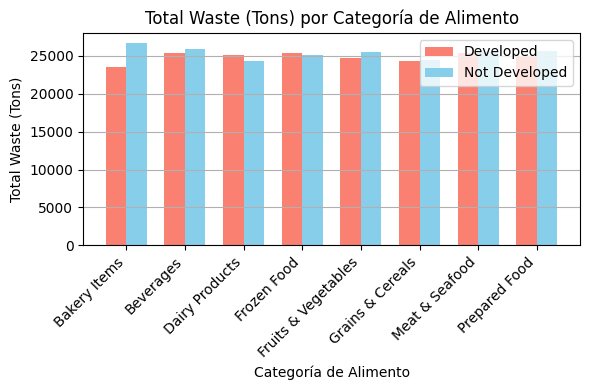

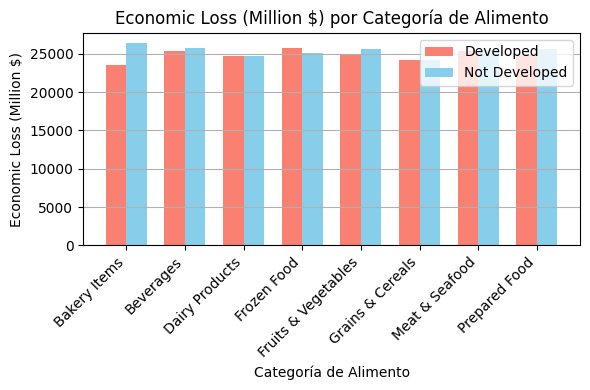

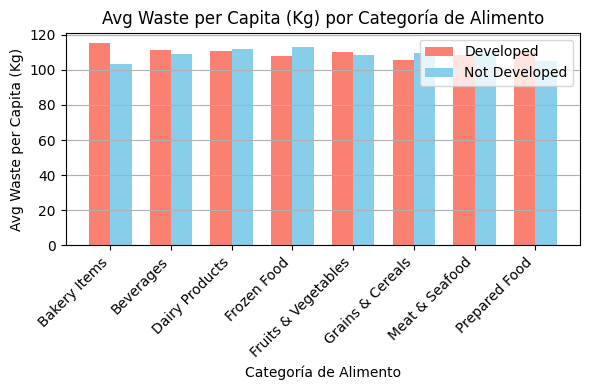

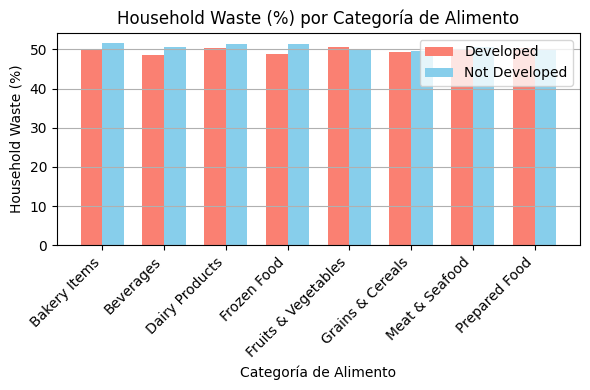

Total Waste (Tons)  Economic Loss (Million $)  \
Bakery Items                3136.433928                2826.524956   
Beverages                    530.758055                 381.095567   
Dairy Products               869.616365                  10.827870   
Frozen Food                  143.884209                 621.822638   
Fruits & Vegetables          761.781669                 644.344971   
Grains & Cereals              41.635045                  10.872664   
Meat & Seafood               211.893352                  98.596085   
Prepared Food                727.397668                 745.198071   

                     Avg Waste per Capita (Kg)  Household Waste (%)  
Bakery Items                         11.970135             1.893851  
Beverages                             2.406916             1.840453  
Dairy Products                        1.180925             1.126614  
Frozen Food                           5.191195             2.562599  
Fruits & Vegetables                   1.545245             0.675808  
Grains & Cereals                      4.016362             0.404332  
Meat & Seafood                        2.116003             0.723536  
Prepared Food                         5.555327             0.157634

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Definir los conjuntos según la hipótesis planteada
least_developed_countries = {
    'Argentina', 'Brazil', 'India', 'Indonesia', 'Mexico', 'Saudi Arabia', 'South Africa', 'Turkey'
}

most_developed_countries = {
    'Australia', 'Canada', 'China', 'France', 'Germany', 'Italy',
    'Japan', 'Russia', 'South Korea', 'Spain', 'UK', 'USA'
}

# Clasificar países según el conjunto
def classify_country(country):
    if country in most_developed_countries:
        return 'Developed'
    elif country in least_developed_countries:
        return 'Not Developed'
    else:
        return 'Other'

# Aplicar clasificación
df['Country Group'] = df['Country'].apply(classify_country)

# Agrupar por grupo de país y categoría de alimento
grouped_summary = df[df['Country Group'].isin(['Developed', 'Not Developed'])].groupby(
    ['Country Group', 'Food Category']
)[[
    'Total Waste (Tons)',
    'Economic Loss (Million $)',
    'Avg Waste per Capita (Kg)',
    'Household Waste (%)'
]].mean().reset_index()

# Lista de métricas a graficar
metrics = [
    'Total Waste (Tons)',
    'Economic Loss (Million $)',
    'Avg Waste per Capita (Kg)',
    'Household Waste (%)'
]

# Categorías en eje X
categories = grouped_summary['Food Category'].unique()
x = np.arange(len(categories))  # posiciones en eje X

bar_width = 0.35  # ancho de cada barra

# Crear una lista para almacenar las diferencias
differences = []

for metric in metrics:
    plt.figure(figsize=(6, 4))

    # Obtener valores por grupo en el mismo orden de categorías
    developed = grouped_summary[grouped_summary['Country Group'] == 'Developed'].set_index('Food Category').loc[categories]
    not_developed = grouped_summary[grouped_summary['Country Group'] == 'Not Developed'].set_index('Food Category').loc[categories]

    # Calcular la diferencia entre los países desarrollados y no desarrollados
    difference = np.abs(developed[metric] - not_developed[metric])
    differences.append(difference)

    # Graficar barras lado a lado
    plt.bar(x - bar_width/2, developed[metric], width=bar_width, label='Developed', color='salmon')
    plt.bar(x + bar_width/2, not_developed[metric], width=bar_width, label='Not Developed', color='skyblue')

    # Personalizar gráfico
    plt.xticks(ticks=x, labels=categories, rotation=45, ha='right')
    plt.title(f'{metric} por Categoría de Alimento')
    plt.xlabel('Categoría de Alimento')
    plt.ylabel(metric)
    plt.legend()
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()

# Crear un DataFrame para las diferencias
difference_df = pd.DataFrame(differences, index=metrics).T
difference_df.index = categories

# Mostrar la tabla con las diferencias
display(difference_df)


## Hipotesis N° 2:

La categoría de alimentos Frozen Food presenta un mayor promedio de desperdicio por persona en Estados Unidos que en Italia. Esto se debe, en parte, al estilo de vida: en Italia se prefiere el consumo de comida fresca, mientras que en Estados Unidos es más común el consumo de alimentos procesados.


Datos por fila para Prepared Food (USA e Italy):
     Country  Avg Waste per Capita (Kg)  Total Waste (Tons)  \
107      USA                     192.56            35924.32   
201    Italy                      40.00            16593.43   
244      USA                      88.77             9749.60   
307      USA                     182.31             9272.98   
329    Italy                     109.09             3007.77   
...      ...                        ...                 ...   
4597     USA                     182.31            10355.42   
4656     USA                     116.98            32441.69   
4765   Italy                     197.73            25304.57   
4776     USA                     116.67            41492.82   
4967     USA                     190.36            24982.19   

      Economic Loss (Million $)  
107                    30004.90  
201                    16794.72  
244                     8533.14  
307                    10324.97  
329                     

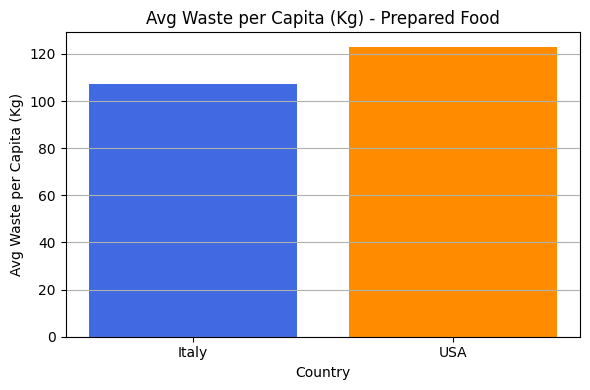

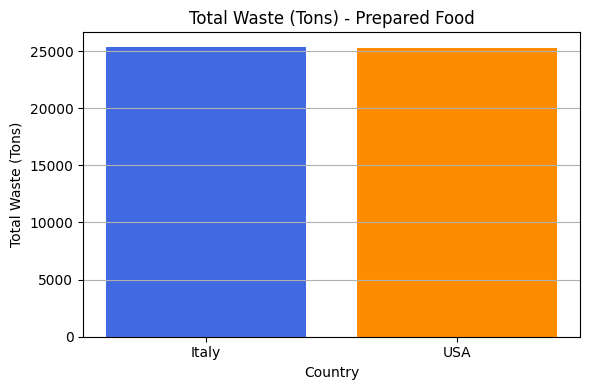

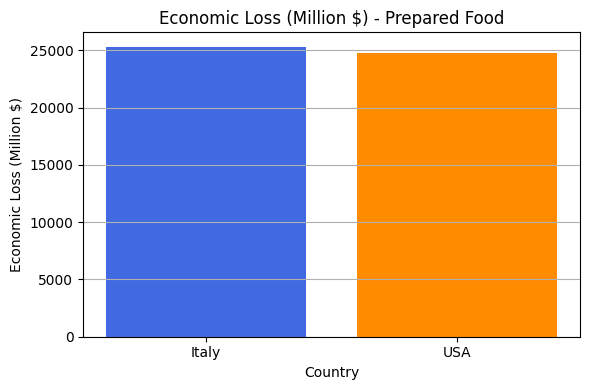

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los datos para Estados Unidos e Italia y la categoría Prepared Food
prepared_food_comparison = df[
    (df['Food Category'] == 'Prepared Food') &
    (df['Country'].isin(['USA', 'Italy']))
][['Country', 'Avg Waste per Capita (Kg)', 'Total Waste (Tons)', 'Economic Loss (Million $)']]

# Mostrar los datos filtrados
print("Datos por fila para Prepared Food (USA e Italy):")
print(prepared_food_comparison)

# Calcular el promedio por país
avg_prepared_by_country = prepared_food_comparison.groupby('Country')[[
    'Avg Waste per Capita (Kg)',
    'Total Waste (Tons)',
    'Economic Loss (Million $)'
]].mean().reset_index()

# Mostrar los promedios
print("\nPromedio por país:")
print(avg_prepared_by_country)

# Crear gráficos de comparación
metrics = ['Avg Waste per Capita (Kg)', 'Total Waste (Tons)', 'Economic Loss (Million $)']

for metric in metrics:
    plt.figure(figsize=(6, 4))
    plt.bar(avg_prepared_by_country['Country'], avg_prepared_by_country[metric], color=['royalblue', 'darkorange'])
    plt.title(f'{metric} - Prepared Food')
    plt.ylabel(metric)
    plt.xlabel('Country')
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()



## Hipotesis N° 3:

Hipotetizamos ademas que en paises que son mas calidos hay mas desperdicios de frutas y vegetales al contrario de las frias que podrian ser mas las comidas preparadas, conmgeladas, granos y cereales.


   Zona Climática        Food Category  Total Waste (Tons)  \
0     Zona Cálida         Bakery Items        25480.308120   
1     Zona Cálida            Beverages        26332.916743   
2     Zona Cálida       Dairy Products        25253.560214   
3     Zona Cálida          Frozen Food        25371.140372   
4     Zona Cálida  Fruits & Vegetables        24476.152101   
5     Zona Cálida     Grains & Cereals        24159.779463   
6     Zona Cálida       Meat & Seafood        25482.593554   
7     Zona Cálida        Prepared Food        25398.197220   
8       Zona Fría         Bakery Items        24257.574947   
9       Zona Fría            Beverages        25083.502698   
10      Zona Fría       Dairy Products        24562.393298   
11      Zona Fría          Frozen Food        25171.443150   
12      Zona Fría  Fruits & Vegetables        25431.708292   
13      Zona Fría     Grains & Cereals        24515.524751   
14      Zona Fría       Meat & Seafood        25356.914270   
15      

<Figure size 800x400 with 0 Axes>

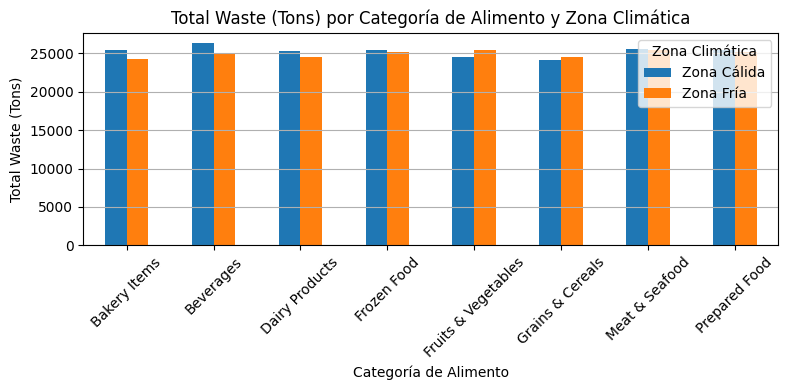

<Figure size 800x400 with 0 Axes>

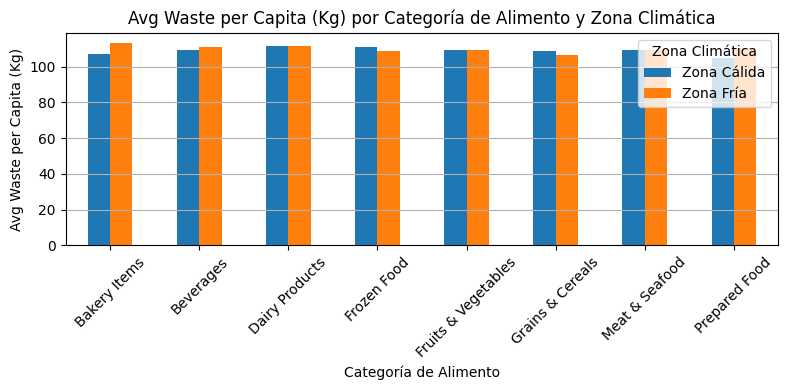

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt

# Corregir errores en nombres de países si es necesario
df['Country'] = df['Country'].replace('South África', 'South Africa')

# Definir zonas
zonas_frias = {
    'Argentina', 'Canada', 'China', 'France', 'Germany', 'Japan',
    'Mexico', 'Russia', 'South Korea', 'Spain', 'UK', 'USA'
}

zonas_calidas = {
    'Australia', 'Brazil', 'India', 'Indonesia', 'Italy',
    'Saudi Arabia', 'South Africa', 'Turkey'
}

# Clasificar países por zona climática
def clasificar_zona(country):
    if country in zonas_frias:
        return 'Zona Fría'
    elif country in zonas_calidas:
        return 'Zona Cálida'
    else:
        return 'Otra'

df['Zona Climática'] = df['Country'].apply(clasificar_zona)

# Agrupar por zona climática y categoría de alimento
zona_categoria_summary = df[df['Zona Climática'].isin(['Zona Fría', 'Zona Cálida'])].groupby(
    ['Zona Climática', 'Food Category']
)[['Total Waste (Tons)', 'Avg Waste per Capita (Kg)']].mean().reset_index()

# Mostrar resumen
print(zona_categoria_summary)

# ------------------------
# Graficar comparación
# ------------------------

# Lista de métricas a graficar
metrics = ['Total Waste (Tons)', 'Avg Waste per Capita (Kg)']

# Crear un gráfico para cada métrica
for metric in metrics:
    plt.figure(figsize=(8, 4))

    # Pivotar para facilitar el gráfico
    pivot_df = zona_categoria_summary.pivot(index='Food Category', columns='Zona Climática', values=metric)
    pivot_df.plot(kind='bar', figsize=(8, 4), rot=45)

    plt.title(f'{metric} por Categoría de Alimento y Zona Climática')
    plt.ylabel(metric)
    plt.xlabel('Categoría de Alimento')
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()


# 4. Exploración y generación de insights iniciales

4.1. Análisis descriptivo básico (media, mediana, desviación estándar, valores máximos y mínimos).


In [ ]:
df.describe()

Year  Total Waste (Tons)  Economic Loss (Million $)  \
count  5000.000000         5000.000000                5000.000000   
mean   2021.015600        25061.780072               25039.703870   
std       1.999239        14245.119588               14620.236429   
min    2018.000000          502.610000                 406.690000   
25%    2019.000000        12783.737500               12612.477500   
50%    2021.000000        24865.220000               24428.155000   
75%    2023.000000        37471.035000               37146.037500   
max    2024.000000        49990.760000               59228.930000   

       Avg Waste per Capita (Kg)  Population (Million)  Household Waste (%)  
count                 5000.00000           5000.000000          5000.000000  
mean                   109.46397            706.606416            50.060890  
std                     51.93373            402.546464            11.596203  
min                     20.09000             11.290000            30.020000  
25%                     64.05000            350.602500            40.012500  
50%                    110.08000            713.530000            50.295000  
75%                    154.52500           1057.255000            60.125000  
max                    199.97000           1399.970000            70.000000

4.2 Análisis de distribución (histogramas o gráficos adecuados).

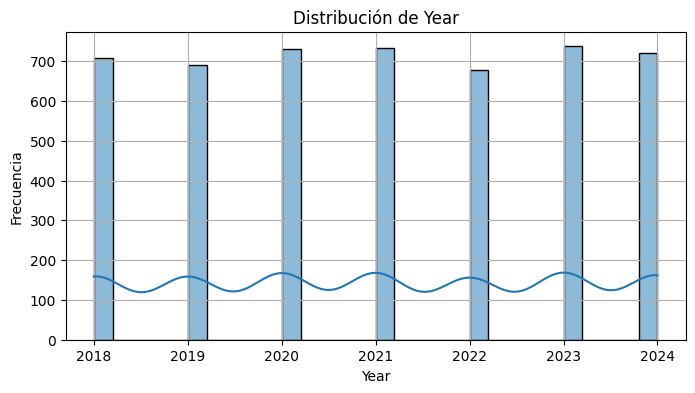

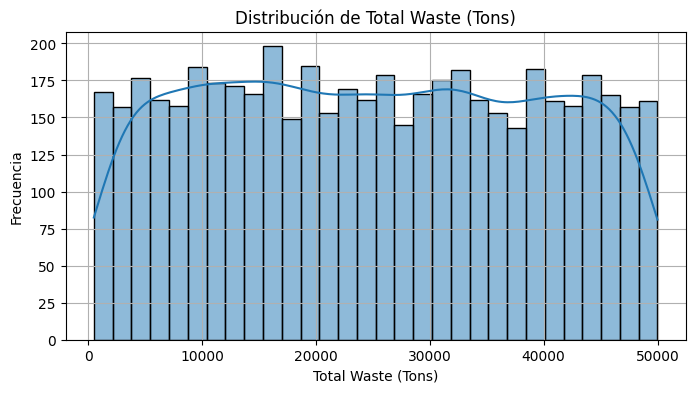

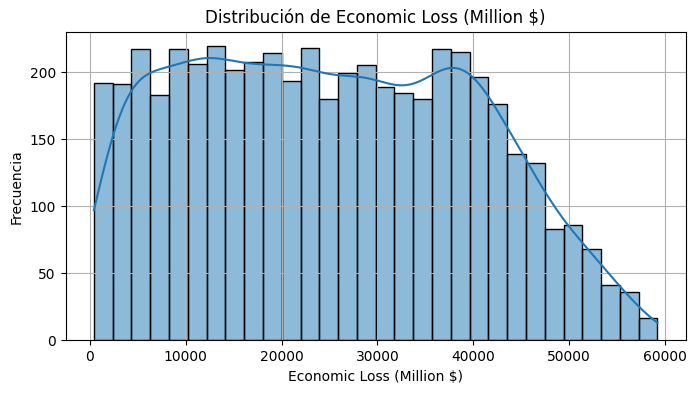

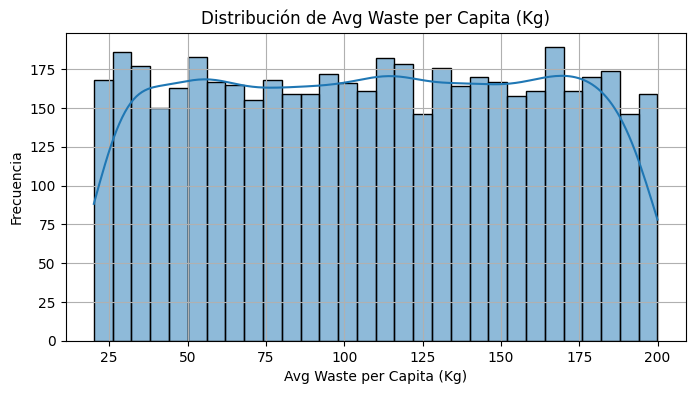

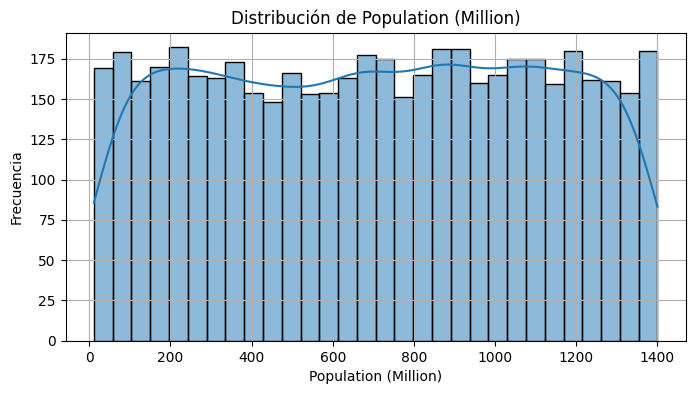

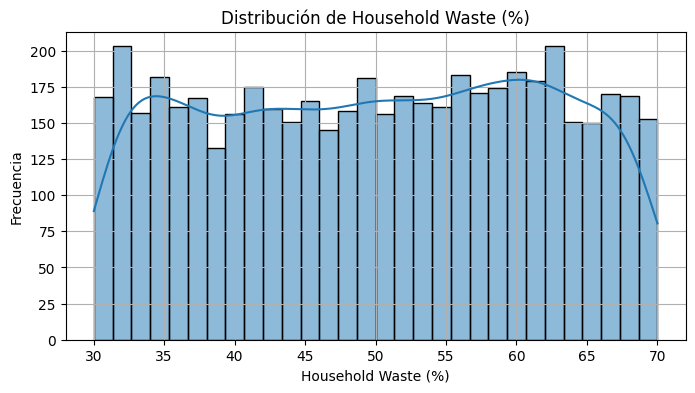

In [ ]:
import seaborn as sns
# Seleccionar las columnas numéricas del DataFrame
columnas_numericas = df.select_dtypes(include='number').columns

# Crear histogramas para cada columna numérica
for col in columnas_numericas:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()


4.3 Análisis de correlación entre variables (matriz de correlación y mapas de calor).


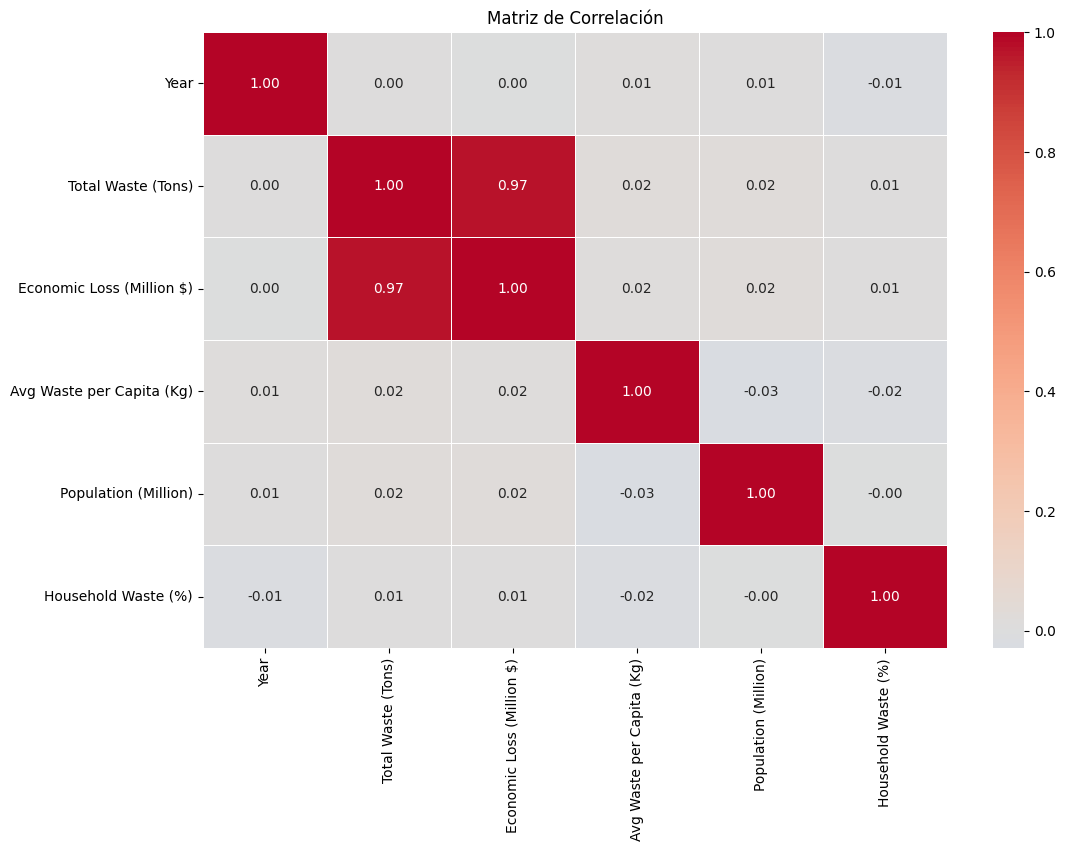

In [ ]:
# Seleccionar solo las columnas numéricas
numericas = df.select_dtypes(include='number')

# Calcular la matriz de correlación
matriz_corr = numericas.corr()

# Mostrar la matriz como mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


Identifiquen al menos 3 insights preliminares derivados del análisis inicial.

**1. Insights:**  Primero uno pensaría que los países mas desarrollados por mucho le llevan la delantera a los menos desarrollados en temas de ser consientes con las perdidas de alimento, el impacto y debido a lo avanzado de sus gobiernos. Pero en el primer análisis pudimos aclarar que se llevan por muy poco, al hacer gráficos comparativos pudimos dilucidar que en perdidas en toneladas la diferencia mas alta fue de apenas 3 mil toneladas en comparación con países bajos y económicas la mas baja fueron de 10 millones en productos diarios.

**2. Insights:** La categoría de alimentos Frozen Food presenta un mayor promedio de desperdicio por persona en Estados Unidos que en Italia y es así como a través de un grafico pudimos confirmar esta hipótesis. Esto se debe, en parte, al estilo de vida: en Italia se prefiere el consumo de comida fresca, mientras que en Estados Unidos es más común el consumo de alimentos procesados como habíamos definido anteriormente en la hipótesis.

**3. Insights:** Por ultimo se refuta lo que creíamos anteriormente y de hecho es al contrario, en países mas cálidos se conserva mas las frutas y verduras, no así las comidas preparadas.